<a id='Top'></a>
# 18. Test Cases
<div class="alert alert-block alert-danger" style="margin-top: 20px">
<font color=black>

- 18.1. [Introduction: Test Cases](#18.1)
- 18.2. [Checking Assumptions About Data Types](#18.2)
- 18.3. [Checking Other Assumptions](#18.3)
- 18.4. [Testing Conditionals](#18.4)
- 18.5. [Testing Loops](#18.5)
- 18.6. [Writing Test Cases for Functions](#18.6)
  - 18.6.1. [Return Value Tests](#18.6.1)
  - 18.6.2. [Side Effect Tests](#18.6.2)
- 18.7. [Testing Optional Parameters](#18.7)
- 18.8. 👩‍💻 [Program Development](#18.8)
- 18.9. [Glossary](#18.9)
- 18.10. [Chapter Assessment](#18.10)</div>

<a id='18.1'></a>
## 18.1. Introduction: Test Cases
A __test case__ expresses requirements for a program, in a way that can be checked automatically. Specifically, a test asserts something about the state of the program at a particular point in its execution.

We have previously suggested that it’s a good idea to first write down comments about what your code is supposed to do, before actually writing the code. It is an even better idea to write down some test cases before writing a program.

There are several reasons why it’s a good habit to write test cases.

- Before we write code, we have in mind what it *should* do, but those thoughts may be a little vague. Writing down test cases forces us to be more concrete about what should happen.

- As we write the code, the test cases can provide automated feedback. You’ve actually been the beneficiary of such automated feedback via test cases throughout this book in some of the activecode windows and almost all of the exercises. We wrote the code for those test cases but kept it hidden, so as not to confuse you and also to avoid giving away the answers. You can get some of the same benefit from writing your own test cases.

- In larger software projects, the set of test cases can be run every time a change is made to the code base. __Unit tests__ check that small bits of code are correctly implemented. __Functional tests__ check that larger chunks of code work correctly. Running the tests can help to identify situations where a change in code in one place breaks the correct operation of some other code. We won’t see that advantage of test cases in this textbook, but keep in mind that this introduction to test cases is setting the stage for an essential software engineering practice if you are participating in a larger software development project.

Now it’s time to learn how to write code for test cases.

Python provides a statement called <font color=red>assert</font>.

- Following the word assert there will be a python expression.
- If that expression evaluates to the Boolean <font color=red>False</font>, then the interpreter will raise a runtime error.
- If the expression evaluates to <font color=red>True</font>, then nothing happens and the execution goes on to the next line of code.

Why would you ever want to write a line of code that can never compute anything useful for you, but sometimes causes a runtime error? For all the reasons we described above about the value of automated tests. You want a test that will alert that you that some condition you assumed was true is not in fact true. It’s much better to be alerted to that fact right away than to have some unexpected result much later in your program execution, which you will have trouble tracing to the place where you had an error in your code.

Why doesn’t <font color=red>assert</font> print out something saying that the test passed? The reason is that you don’t want to clutter up your output window with the results of automated tests that pass. You just want to know when one of your tests fails. In larger projects, other testing harnesses are used instead of <font color=red>assert</font>, such as the python <font color=red>unittest</font> module. Those provide some output summarizing tests that have passed as well as those that failed. In this textbook, we will just use simple <font color=red>assert</font> statements for automated tests.

To write a test, we must know what we *expect* some value to be at a particular point in the program’s execution. In the rest of the chapter, we’ll see some examples of <font color=red>assert</font> statements and ideas for what kinds of assertions one might want to add in one’s programs.

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <font color=black><b>Note</b><br>
A note to instructors: this chapter is deliberately structured so that you can introduce testing early in the course if you want to. You will need to cover chapter 8, on Conditionals, before starting this chapter, because that chapter covers Booleans. The subchapters on testing types and testing conditionals can be covered right after that. The subchapter on testing functions can be delayed until after you have covered function definition.</div>
    
#### Check your understanding
<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
1. When <font color=red>assert x==y</font> is executed and x and y have different values, what will happen?<br>

A. A runtime error will occur  
B. A message is printed out saying that the test failed.  
C. x will get the value that y currently has  
D. Nothing will happen  
E. A message is printed out saying that the test passed.

<details><summary>Click here for the solution</summary>

<font color=red>► </font>A. A runtime error will occur    
   
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ The expression ``x==y`` evaluates to ``False``, so a runtime error will occur.

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
2. When <font color=red>assert x==y</font> is executed and x and y have the same values, what will happen?<br>

A. A runtime error will occur.  
B. A message is printed out saying that the test failed.  
C. x will get the value that y currently has.  
D. Nothing will happen.  
E. A message is printed out saying that the test passed.

<details><summary>Click here for the solution</summary>

<font color=red>► </font>D. Nothing will happen.    
   
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ The expression ``x==y`` evaluates to ``True``.

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
3. Test cases are a waste of time, because the python interpreter will give an error message when the program runs incorrectly, and that’s all you need for debugging.<br>

A. True  
B. False

<details><summary>Click here for the solution</summary>

<font color=red>► </font>B. False    
   
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Test cases let you test some pieces of code as you write them, rather than waiting for problems to show themselves later.

</details>

<a id='18.2'></a>
## 18.2. Checking Assumptions About Data Types
[Back to top](#Top)

Unlike some other programming languages, the python interpreter does not enforce restrictions about the data types of objects that can be bound to particular variables. For example, in java, before assigning a value to a variable, the program would include a declaration of what type of value (integer, float, Boolean, etc.) that the variable is allowed to hold. The variable <font color=red>x</font> in a python program can be bound to an integer at one point and to a list at some other point in the program execution.

That flexibility makes it easier to get started with programming in python. Sometimes, however, type checking could alert us that something has gone wrong in our program execution. If we are assuming at that <font color=red>x</font> is a list, but it’s actually an integer, then at some point later in the program execution, there will probably be an error. We can add assert<font color=red>text</font> statements that will cause an error to be flagged sooner rather than later, which might make it a lot easier to debug.

In the code below, we explicitly state some natural assumptions about how truncated division might work in python. It turns out that the second asumption is wrong: <font color=red>9.0//5</font> produces <font color=red>2.0</font>, a floating point value!

In [ ]:
assert type(9//5) == int
assert type(9.0//5) == int

In the code below, <font color=red>lst</font> is bound to a list object. In python, not all the elements of a list have to be of the same type. We can check that they all have the same type and get an error if they are not. Notice that with <font color=red>lst2</font>, one of the assertions fails.

In [ ]:
lst = ['a', 'b', 'c']

first_type = type(lst[0])
for item in lst:
    assert type(item) == first_type

lst2 = ['a', 'b', 'c', 17]
first_type = type(lst2[0])
for item in lst2:
    assert type(item) == first_type

<a id='18.3'></a>
## 18.3. Checking Other Assumptions
[Back to top](#Top)

We can also check other assumptions about the values of variables, in addition to their types. For example, we could check that a list has fewer than 10 items.

In [ ]:
lst = ['a', 'b', 'c']

assert len(lst) < 10

<a id='18.4'></a>
## 18.4. Testing Conditionals
[Back to top](#Top)

Ideally, you want tests that will cover both the typical execution of your program and tests for unusual things that might happen, which are called __edge cases__.

If the code has conditional blocks (<font color=red>if..elif..else</font>) then you’ll want to have tests that check that the right block executes when you expect it to. For example, in the code below, z is set to the smaller of x and y, but if they are equal then we set z to 0. Our code even includes a comment to help us keep track of when we think the final code block should execute.

In [ ]:
if x < y:
    z = x
else:
    if x > y:
        z = y
    else:
        ## x must be equal to y
        z = 0

When you start to have complex conditionals, it’s helpful to add comments like that, and once you do you might as well add an assert statement. If the assert ever causes an error, you’ll be grateful to know right away that something has gone wrong and you’ll have a good start on where to look for debugging. In this case, you’ll never get an error, no matter the values of x and y.

In [ ]:
x = 3
y = 4
if x < y:
    z = x
else:
    if x > y:
        z = y
    else:
        ## x must be equal to y
        assert x==y
        z = 0

<a id='18.5'></a>
## 18.5. Testing Loops
[Back to top](#Top)

With a for loop, the edge cases might include iterating over an empty list or string, or iterating over a list with different kinds of contents.

For example, suppose we have a code snippet that is supposed to accumulate the sum of all the numbers in a list, <font color=red>lst</font>, whose value was set sometime before this code snippet is run. If you’ve already learned how to define functions, you can imagine this code snippet inside a function definition.

When <font color=red>lst</font> is <font color=red>[1, 5, 8]</font>, the value at the end should be 14.

In [ ]:
nums = [1, 5, 8]

accum = 0
for w in nums:
    accum = accum + w
assert accum == 14

But what about when <font color=red>lst</font> is an empty list? Maybe we want to assert that the value should be 0, in which case our current accumulation works fine. But suppose we wanted it to be some other value, perhaps the special python value <font color=red>None</font>. By writing an assert statement, we can be alerted that our code doesn’t produce the answer we wanted…

In [ ]:
nums = []

accum = 0
for w in nums:
    accum = accum + w
assert accum == None

…and then we can fix our accumulator code

In [ ]:
nums = []

if len(nums) == 0:
   accum = None
else:
   accum = 0
   for w in nums:
       accum = accum + w
assert accum == None

<a id='18.6'></a>
## 18.6. Writing Test Cases for Functions
[Back to top](#Top)

It is a good idea to write one or more test cases for each function that you define.

A function defines an operation that can be performed. If the function takes one or more parameters, it is supposed to work properly on a variety of possible inputs. Each test case will check whether the function works properly on __one set of possible inputs__.

A useful function will do some combination of three things, given its input parameters:

- Return a value. For these, you will write __return value tests__.
- Modify the contents of some mutable object, like a list or dictionary. For these you will write __side effect tests__.
- Print something or write something to a file. Tests of whether a function generates the right printed output are beyond the scope of this testing framework; you won’t write these tests.

<a id='18.6.1'></a>
### 18.6.1. Return Value Tests
[Back to top](#Top)

Testing whether a function returns the correct value is the easiest test case to define. You simply check whether the result of invoking the function on a particular input produces the particular output that you expect. If <font color=red>f</font> is your function, and you think that it should transform inputs <font color=red>x</font> and <font color=red>y</font> into output <font color=red>z</font>, then you could write a test as <font color=red>assert f(x, y) == z</font>. Or, to give a more concrete example, if you have a function <font color=red>square</font>, you could have a test case <font color=red>assert square(3) ==  9</font>. Call this a __return value test__.

Because each test checks whether a function works properly on specific inputs, the test cases will never be complete: in principle, a function might work properly on all the inputs that are tested in the test cases, but still not work properly on some other inputs. That’s where the art of defining test cases comes in: you try to find specific inputs that are representative of all the important kinds of inputs that might ever be passed to the function.

The first test case that you define for a function should be an “easy” case, one that is prototypical of the kinds of inputs the function is supposed to handle. Additional test cases should handle “extreme” or unusual inputs, sometimes called __edge cases__. For example, if you are defining the “square” function, the first, easy case, might be an input like 3. Additional extreme or unusual inputs around which you create test cases might be a negative number, 0, and a floating point number.

One way to think about how to generate edge cases is to think in terms of __equivalence classes__ of the different kinds of inputs the function might get. For example, the input to the <font color=red>square</font> function could be either positive or negative. We then choose an input from each of these classes. __It is important to have at least one test for each equivalence class of inputs__.

Semantic errors are often caused by improperly handling the boundaries between equivalence classes. The boundary for this problem is zero. __It is important to have a test at each boundary__.

Another way to think about edge cases is to imagine things that could go wrong in the implementation. For example, in the square function we might mistakenly use addition instead of multiplication. Thus, we shouldn’t rely on a test that uses 2 as input, but we might be fooled into thinking it was working when it produced an output of 4, when it was really doubling rather than squaring.

Try adding one or two more test cases for the square function in the code below, based on the suggestions for edge cases.

In [ ]:
def square(x):
    return x*x

assert square(3) == 9

<a id='18.6.2'></a>
### 18.6.2. Side Effect Tests
[Back to top](#Top)

To test whether a function makes correct changes to a mutable object, you will need more than one line of code. You will first set the mutable object to some value, then run the function, then check whether the object has the expected value. Call this a __side effect test__ because you are checking to see whether the function invocation has had the correct side effect on the mutable object.

An example follows, testing the <font color=red>update_counts</font> function (which is deliberately implemented incorrectly…). This function takes a string called <font color=red>letters</font> and updates the counts in <font color=red>counts_diction</font> that are associated with each character in the string. To do a side effect test, we first create a dictionary with initial counts for some letters. Then we invoke the function. Then we test that the dictionary has the correct counts for some letters (those correct counts are computed manually when we write the test. We have to know what the correct answer should be in order to write a test). You can think of it like writing a small exam for your code – we would not give you an exam without knowing the answers ourselves.

In [ ]:
def update_counts(letters, counts_d):
    for c in letters:
        counts_d[c] = 1
        if c in counts_d:
            counts_d[c] = counts_d[c] + 1

counts = {'a': 3, 'b': 2}
update_counts("aaab", counts)
# 3 more occurrences of a, so 6 in all
assert counts['a'] == 6
# 1 more occurrence of b, so 3 in all
assert counts['b'] == 3

#### Check your understanding
<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
1. If you write a complete set of tests and a function passes all the tests, you can be sure that it’s working correctly.<br>

  A. True  
  B. False  

<details><summary>Click here for the solution</summary>

<font color=red>► </font>B. False    
   
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ The tests should cover as many edge cases as you can think of, but there's always a possibility that the function does badly on some input that you didn't include as a test case.

</details>

#### Check your understanding
<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
2. For the hangman game, the blanked function takes a word and some letters that have been guessed, and returns a version of the word with _ for all the letters that haven’t been guessed. Which of the following is the correct way to write a test to check that ‘under’ will be blanked as 'u_d__' when the user has guessed letters d and u so far?<br>

  A. assert blanked('under', 'du', 'u_d__') == True  
  B. assert blanked('under', 'u_d__') == 'du'  
  C. assert blanked('under', 'du') == 'u_d__'

<details><summary>Click here for the solution</summary>

<font color=red>► </font>C. assert blanked('under', 'du') == 'u_d__'    
   
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ This checks whether the value returned from the blanked function is 'u_d__'.

</details>

<a id='18.7'></a>
## 18.7. Testing Optional Parameters
[Back to top](#Top)

If a function takes an optional parameter, one of the edge cases to test for is when no parameter value is supplied during execution. Below are some tests for the built-in sorted function.

In [ ]:
assert sorted([1, 7, 4]) == [1, 4, 7]
assert sorted([1, 7, 4], reverse=True) == [7, 4, 1]

<a id='18.8'></a>
## 18.8. 👩‍💻 Program Development
[Back to top](#Top)

At this point, you should be able to look at complete functions and tell what they do. Also, if you have been doing the exercises, you have written some small functions. As you write larger functions, you might start to have more difficulty, especially with runtime and semantic errors.

To deal with increasingly complex programs, we are going to suggest a technique called __incremental development__. The goal of incremental development is to avoid long debugging sessions by adding and testing only a small amount of code at a time.

__If you write unit tests before doing the incremental development, you will be able to track your progress as the code passes more and more of the tests. Alternatively, you can write additional tests at each stage of incremental development__.

Then you will be able to check whether any code change you make at a later stage of development causes one of the earlier tests, which used to pass, to not pass any more.

As an example, suppose you want to find the distance between two points, given by the coordinates (x1, y1) and (x2, y2). By the Pythagorean theorem, the distance is:

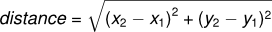

The first step is to consider what a <font color=red>distance</font> function should look like in Python. In other words, what are the inputs (parameters) and what is the output (return value)?

In this case, the two points are the inputs, which we can represent using four parameters. The return value is the distance, which is a floating-point value.

Already we can write an outline of the function that captures our thinking so far.

In [ ]:
def distance(x1, y1, x2, y2):
    return None

Obviously, this version of the function doesn’t compute distances; it always returns None. But it is syntactically correct, and it will run, which means that we can test it before we make it more complicated.

The distance between any point and itself should be 0.

In [ ]:
def distance(x1, y1, x2, y2):
    return None

assert distance(1, 2, 1, 2) == 0

We call the distance function with sample inputs: (1,2, 1,2). The first 1,2 are the coordinates of the first point and the second 1,2 are the coordinates of the second point. What is the distance between these two points? Zero.

It’s not returning the correct answer, so we don’t pass the test. Let’s fix that.

In [ ]:
def distance(x1, y1, x2, y2):
    return 0.0

assert distance(1, 2, 1, 2) == 0

Now we pass the test. But really, that’s not a sufficient test.


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <font color=black><b>Extend the program …</b><br>

On line 6, write another unit test (assert statement). Use (1,2, 4,6) as the parameters to the distance function. How far apart are these two points? Use that value (instead of 0) as the correct answer for this unit test.

On line 7, write another unit test. Use (0,0, 1,1) as the parameters to the distance function. How far apart are these two points? Use that value as the correct answer for this unit test.

Are there any other edge cases that you think you should consider? Perhaps points with negative numbers for x-values or y-values?</div>

__When testing a function, it is essential to know the right answer.__

For the second test the horizontal distance equals 3 and the vertical distance equals 4; that way, the result is 5 (the hypotenuse of a 3-4-5 triangle). For the third test, we have a 1-1-sqrt(2) triangle.

In [ ]:
def distance(x1, y1, x2, y2):
    return 0

assert distance(1, 2, 1, 2) == 0
assert distance(1,2, 4,6) == 5
assert distance(0,0, 1,1) = 2**0.5

The first test passes but the others fail since the distance function does not yet contain all the necessary steps.

At this point we have confirmed that the function is syntactically correct, and we can start adding lines of code. After each incremental change, we test the function again. If an error occurs at any point, we know where it must be — in the last line we added.

A logical first step in the computation is to find the differences x2- x1 and y2- y1. We will store those values in temporary variables named <font color=red>dx</font> and <font color=red>dy</font>.

In [ ]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    return 0.0

Next we compute the sum of squares of <font color=red>dx</font> and <font color=red>dy</font>.

In [ ]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    dsquared = dx**2 + dy**2
    return 0.0

Again, we could run the program at this stage and check the value of <font color=red>dsquared</font> (which should be 25).

Finally, using the fractional exponent <font color=red>0.5</font> to find the square root, we compute and return the result.

In [ ]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    dsquared = dx**2 + dy**2
    result = dsquared**0.5
    return result

assert distance(1, 2, 1, 2) == 0
assert distance(1,2, 4,6) == 5
assert distance(0,0, 1,1) = 2**0.5

When you start out, you might add only a line or two of code at a time. As you gain more experience, you might find yourself writing and debugging bigger conceptual chunks. As you improve your programming skills you should find yourself managing bigger and bigger chunks: this is very similar to the way we learned to read letters, syllables, words, phrases, sentences, paragraphs, etc., or the way we learn to chunk music — from individual notes to chords, bars, phrases, and so on.

The key aspects of the process are:

1. Make sure you know what you are trying to accomplish. Then you can write appropriate unit tests.
2. Start with a working skeleton program and make small incremental changes. At any point, if there is an error, you will know exactly where it is.
3. Use temporary variables to hold intermediate values so that you can easily inspect and check them.
4. Once the program is working, you might want to consolidate multiple statements into compound expressions, but only do this if it does not make the program more difficult to read.

<a id='18.9'></a>
## 18.9. Glossary
[Back to top](#Top)

__return value test__  
A return value test invokes a function on a particular set of inputs and checks whether the return value is the correct one for those inputs.

__side effect test__  
A side effect test invokes a function or method and then checks whether some object’s contents were suitably transformed by the end of the execution of the function or method.

__test case__  
An assertion about the state of the program at particular point in its execution, such as the type of a variable or of a value returned by a function.

<a id='18.10'></a>
## 18.10. Chapter Assessment
[Back to top](#Top)

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
1. The function mySum is supposed to return the sum of a list of numbers (and 0 if that list is empty), but it has one or more errors in it. Use this space to write test cases to determine what errors there are. You will be using this information to answer the next set of multiple choice questions.

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
n1 = [1, 2, 3]
n2 = [999]
n3 = []
test1 = mySum(n1)
test2 = mySum(n2)
test3 = mySum(n3)
#assert test1 == 6 
assert test2 == 999
#assert test3 == 0
```

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
2. Which of the following cases fail for the mySum function?

  A. an empty list  
  B. a list with one item  
  C. a list with more than one item

<details><summary>Click here for the solution</summary>

<font color=red>► </font>A. an empty list<br>
<font color=red>► </font>C. a list with more than one item
   
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Correct.<br>
A. 0 is not returned if the function is given an empty list.<br>
C. a list with more than one item does not provide the correct response.

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
3. Are there any other cases, that we can determine based on the current structure of the function, that also fail for the mySum function?

  A. Yes  
  B. No

<details><summary>Click here for the solution</summary>

<font color=red>► </font>B. No
   
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Correct. At the moment we can't tell if other cases would fail (such as combining integers and floats), but it is possible that the function could have more issues once the current issues are fixed.

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
4.  
    
__The class Student is supposed to accept two arguments in its constructor:__

1. A name string
2. An optional integer representing the number of years the student has been at Michigan (default:1)

__Every student has three instance variables:__
    
1. self.name (set to the name provided)
2. self.years_UM (set to the number of years the student has been at Michigan)
3. self.knowledge (initialized to 0)

__There are three methods:__
    
- .study() should increase self.knowledge by 1 and return None
- .getKnowledge() should return the value of self.knowledge
- .year_at_umich() should return the value of self.years_UM

There are one or more errors in the class. Use this space to write test cases to determine what errors there are. You will be using this information to answer the next set of multiple choice questions.

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
student = Student('John Smith', 2)
assert student.name == 'John Smith'
#assert student.years_UM == 2
student.study()
```

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

5. Which of the following cases fail for the Student class?<br>

  A. the method study does not return None  
  B. the optional integer in the constructor is not optional  
  C. the attributes/instance variables are not correctly assigned in the constructor  
  D. the method study does not increase self.knowledge  
  E. the method year_at_umich does not return the value of self.years_UM

<details><summary>Click here for the solution</summary>

<font color=red>► </font>C. the attributes/instance variables are not correctly assigned in the constructor  
<font color=red>► </font>D. the method study does not increase self.knowledge
   
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Correct.<br>
C. The constructor does not actually use the optional integer that is provided. Instead it sticks with using the default value.<br>
D. Study does not increase the self.knowledge.

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

6. Are there any other cases, that we can determine based on the current structure of the class, that also fail for the Student class?

  A. Yes  
  B. No

<details><summary>Click here for the solution</summary>

<font color=red>► </font>A. Yes  
   
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Correct! There is an issue with the getKnowledge method because it returns None when self.knowledge is 0, even though it returns the correct value when self.knowledge is non-zero.

</details>